In [3]:
import pandas as pd
from pathlib import Path

clean_path = Path("/Users/keerthanavenkatesan/Documents/Data Managment/CS210FinalProject/Spotify_Popularity_Prediction/data/cleaned/spotify_100k.csv")

df = pd.read_csv(clean_path)
df.head()

print("SHAPE:", df.shape, "\n")
print("COLUMNS:\n", list(df.columns), "\n")
print("DTYPES:\n", df.dtypes, "\n")


SHAPE: (100000, 20) 

COLUMNS:
 ['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'] 

DTYPES:
 Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object 



In [4]:
print("MISSING VALUES:\n")
print(df.isna().sum().sort_values(ascending=False))

print("\nDUPLICATES:", df.duplicated().sum(), "\n")

print("SUMMARY STATS:")
display(df.describe(include='all'))

MISSING VALUES:

Unnamed: 0          0
artist_name         0
duration_ms         0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
genre               0
year                0
popularity          0
track_id            0
track_name          0
time_signature      0
dtype: int64

DUPLICATES: 0 

SUMMARY STATS:


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.000000e+05,100000,100000,100000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
unique,NaN,30524,90830,100000,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Traditional,Intro,3FTqjWmL21xi4HTTOq94EQ,NaN,NaN,gospel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,339,42,1,NaN,NaN,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.589289e+05,NaN,NaN,NaN,18.53810,2011.997890,NaN,0.538501,0.639926,5.288470,-8.960420,0.637210,0.092999,0.321203,0.250514,0.223214,0.456931,121.357131,2.485470e+05,3.885080
std,4.283741e+05,NaN,NaN,NaN,15.93253,6.798005,NaN,0.183760,0.269552,3.552405,5.643217,0.480807,0.126953,0.353851,0.364292,0.201325,0.268705,29.854491,1.450150e+05,0.469995
min,2.000000e+00,NaN,NaN,NaN,0.00000,2000.000000,NaN,0.000000,0.000000,0.000000,-52.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+03,0.000000
25%,2.915808e+05,NaN,NaN,NaN,5.00000,2006.000000,NaN,0.415000,0.453000,2.000000,-10.814000,0.000000,0.037100,0.006700,0.000001,0.097900,0.228000,98.605750,1.807330e+05,4.000000
50%,5.774625e+05,NaN,NaN,NaN,15.00000,2012.000000,NaN,0.551000,0.694000,5.000000,-7.448000,1.000000,0.050700,0.149000,0.001590,0.134000,0.439000,121.646500,2.250980e+05,4.000000
75%,1.032490e+06,NaN,NaN,NaN,29.00000,2018.000000,NaN,0.677000,0.872000,8.000000,-5.277000,1.000000,0.089400,0.638000,0.605000,0.292000,0.676000,139.909000,2.859470e+05,4.000000


These features are not useful:

Unnamed: 0 → index artifact

track_id → unique per row

track_name → 90,830 unique values (too many for reliable modeling)

artist_name → 30,524 unique artists (too high to encode meaningfully)

These will not help prediction.

Categorical feature:

Genre:

82 unique genres --> "gospel" is the largest with 1,942 tracks

This column is useful and should be encoded (one-hot encoding top genres).

Numerical features:
Loudness ranges from -52 dB to +2.5 dB

Danceability, energy, acousticness, valence all have [0,1] ranges

Tempo ranges from ~0 to 250

Duration_ms ranges from ~2000 to 4.8 million

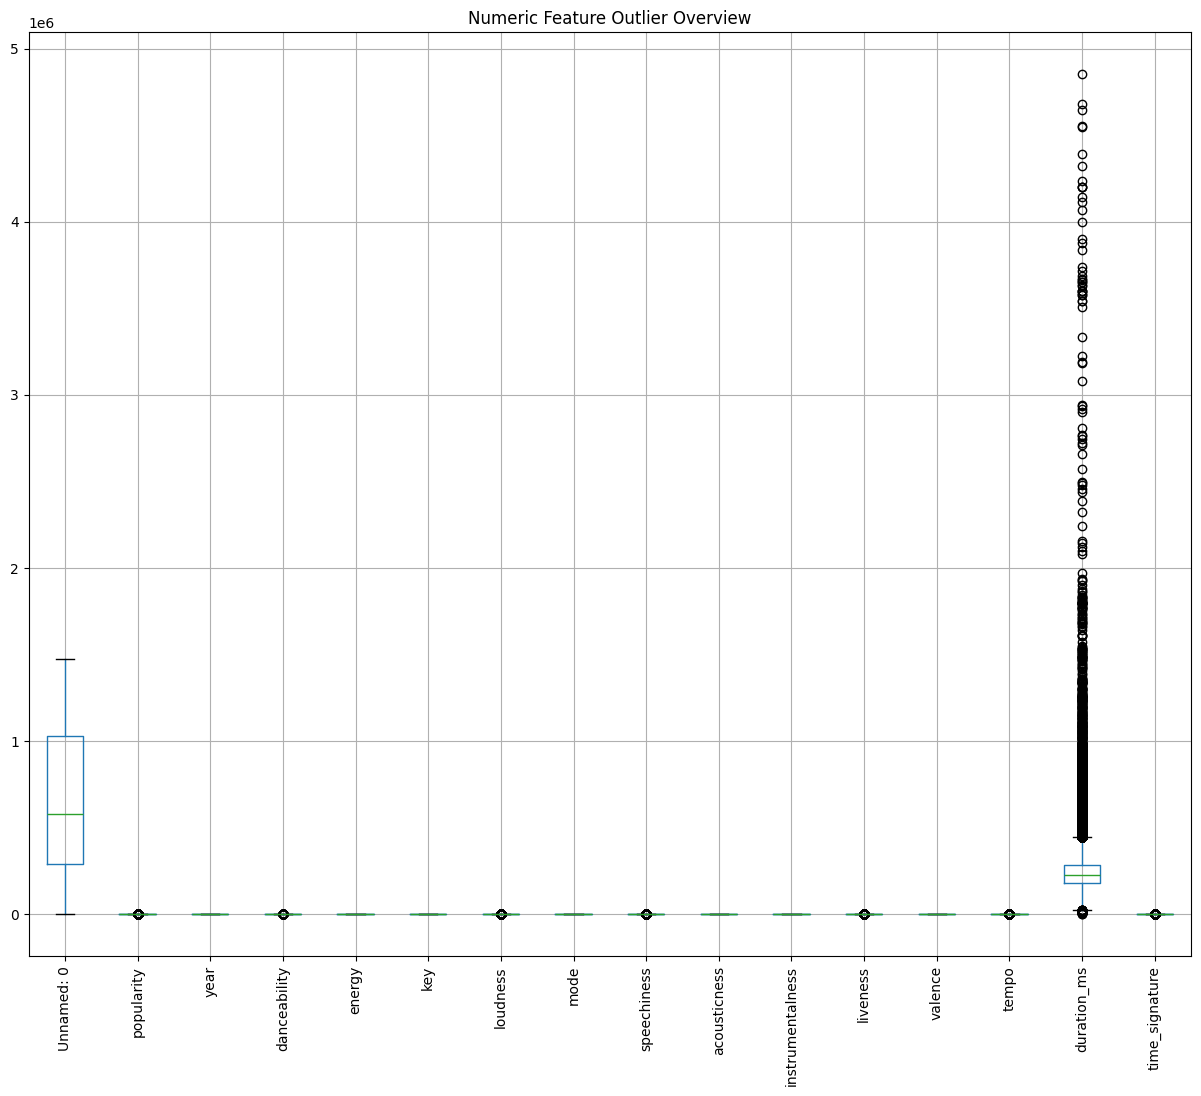

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
df[numeric_cols].boxplot(rot=90)
plt.title("Numeric Feature Outlier Overview")
plt.show()


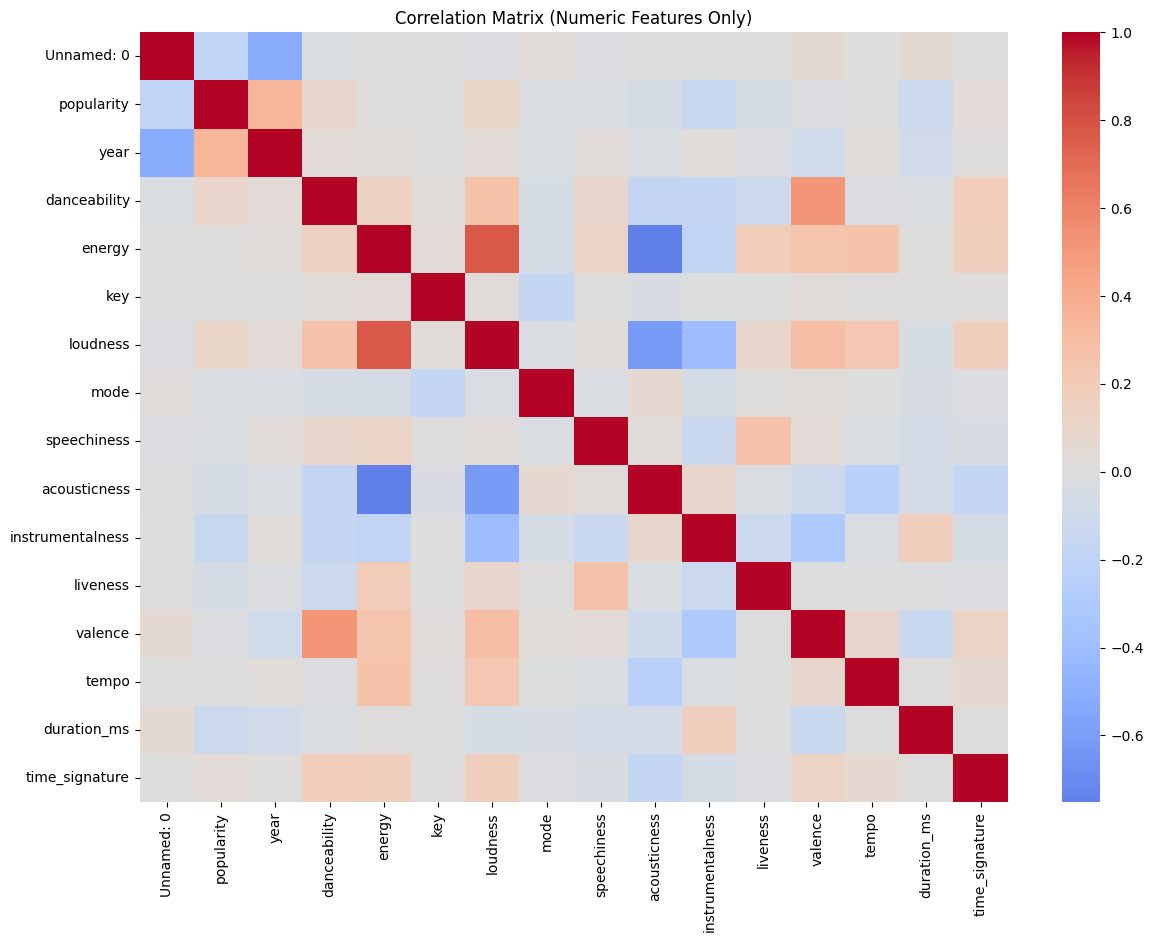

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [9]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_target = df_numeric.corr()['popularity'].sort_values(ascending=False)
corr_target


popularity          1.000000
year                0.345017
loudness            0.106874
danceability        0.100314
time_signature      0.035012
energy              0.008334
key                 0.005755
tempo               0.000986
valence            -0.015773
speechiness        -0.024002
mode               -0.024179
acousticness       -0.059188
liveness           -0.059363
duration_ms        -0.121842
instrumentalness   -0.151829
Unnamed: 0         -0.198888
Name: popularity, dtype: float64

In [10]:
df_info = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str)
})

df_info


,column,dtype
Unnamed: 0,Unnamed: 0,int64
artist_name,artist_name,object
track_name,track_name,object
track_id,track_id,object
popularity,popularity,int64
year,year,int64
genre,genre,object
danceability,danceability,float64
energy,energy,float64
key,key,int64


In [11]:
df['popularity'].describe()

count    100000.00000
mean         18.53810
std          15.93253
min           0.00000
25%           5.00000
50%          15.00000
75%          29.00000
max          93.00000
Name: popularity, dtype: float64